# Residuals Analysis
## Do they correlate with other channels' spend?

### Preparing Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [6]:
csv_url = 'https://raw.githubusercontent.com/pstat197/BlueAlpha3-Synergy-Analysis/refs/heads/main/data/monthly_mocha.csv'
data = pd.read_csv(csv_url)

data.head()

,date,subscriptions,meta_spend,meta_impressions,google_spend,google_impressions,snapchat_spend,snapchat_impressions,tiktok_spend,tiktok_impressions,moloco_spend,moloco_impressions,liveintent_spend,liveintent_impressions,roku_spend,roku_impressions,beehiiv_spend,beehiiv_impressions,amazon_spend,amazon_impressions
0,8/4/25,15540,91538.06648,16572258,116667.9945,6473132,94750.04035,3420454,0.0,0,6564.524233,367206,37766.44904,371854,0,0,18190.10332,181901,0.0,0
1,7/28/25,14525,93840.18612,25300600,180486.9558,9487127,99447.23218,3235285,0.0,0,18111.083980,820589,38543.27888,347850,0,0,20063.91811,200639,0.0,0
2,7/21/25,16880,48403.06780,14099214,200817.3250,7909118,84738.57435,4766750,0.0,0,9714.794608,369806,39697.42202,322865,0,0,20828.00074,208280,0.0,0
3,7/14/25,20113,49470.96783,13652072,215770.9242,7789279,83204.40500,4022680,0.0,0,16831.841440,554980,40561.34006,570418,0,0,24097.34426,240973,0.0,0
4,7/7/25,16492,48948.28744,10121002,209231.9668,6806878,82642.37271,4532105,0.0,0,17624.908800,894891,40012.42040,483619,0,0,19967.60420,199676,0.0,0


In [18]:
corr_data = data.drop(columns=['subscriptions', 'date'])
zero_value_columns = [col for col in corr_data.columns if (corr_data[col] == 0).all()]

if zero_value_columns:
    corr_data = corr_data.drop(columns=zero_value_columns)
    print(f"Dropped columns with all zero values: {zero_value_columns}")
else:
    print("No columns with all zero values found.")

display(corr_data.head())

Dropped columns with all zero values: ['roku_spend', 'roku_impressions']


,meta_spend,meta_impressions,google_spend,google_impressions,snapchat_spend,snapchat_impressions,tiktok_spend,tiktok_impressions,moloco_spend,moloco_impressions,liveintent_spend,liveintent_impressions,beehiiv_spend,beehiiv_impressions,amazon_spend,amazon_impressions,prediction,residual
0,91538.06648,16572258,116667.9945,6473132,94750.04035,3420454,0.0,0,6564.524233,367206,37766.44904,371854,18190.10332,181901,0.0,0,14909.914084,630.085916
1,93840.18612,25300600,180486.9558,9487127,99447.23218,3235285,0.0,0,18111.083980,820589,38543.27888,347850,20063.91811,200639,0.0,0,16492.824705,-1967.824705
2,48403.06780,14099214,200817.3250,7909118,84738.57435,4766750,0.0,0,9714.794608,369806,39697.42202,322865,20828.00074,208280,0.0,0,15435.673938,1444.326062
3,49470.96783,13652072,215770.9242,7789279,83204.40500,4022680,0.0,0,16831.841440,554980,40561.34006,570418,24097.34426,240973,0.0,0,15720.942978,4392.057022
4,48948.28744,10121002,209231.9668,6806878,82642.37271,4532105,0.0,0,17624.908800,894891,40012.42040,483619,19967.60420,199676,0.0,0,15549.787767,942.212233


In [19]:
target = "subscriptions"
channels = ["meta_spend", "google_spend", "snapchat_spend"]

X = data[channels]
y = data[target]

model = LinearRegression()
model.fit(X, y)

data["prediction"] = model.predict(X)
data["residual"] = y - data["prediction"]

In [21]:
results = []

for ch in channels:
    pearson_corr, pearson_p = pearsonr(data["residual"], data[ch])
    spearman_corr, spearman_p = spearmanr(data["residual"], data[ch])

    results.append({
        "channel": ch,
        "pearson_corr": pearson_corr,
        "pearson_p": pearson_p,
        "spearman_corr": spearman_corr,
        "spearman_p": spearman_p
    })

results_df = (
    pd.DataFrame(results)
      .sort_values("pearson_corr", ascending=False)
)

results_df

,channel,pearson_corr,pearson_p,spearman_corr,spearman_p
0,meta_spend,-1.179612e-16,1.0,-0.010088,0.932020
1,google_spend,-3.400058e-16,1.0,0.064672,0.584080
2,snapchat_spend,-3.569194e-16,1.0,-0.004132,0.972129


### Residual Diagnostic Results. 
Examining Pearson and Spearman correlations between model residuals and individual channel spends as standard diagnostic checks for misspecification or omitted structure. Across all channels, correlations are effectively zero with very high p-values, indicating no statistically significant linear or monotonic dependence between residuals and channel inputs. This suggests that the model has absorbed the systematic channel-level signal, leaving residual variation consistent with noise rather than unmodeled effects.

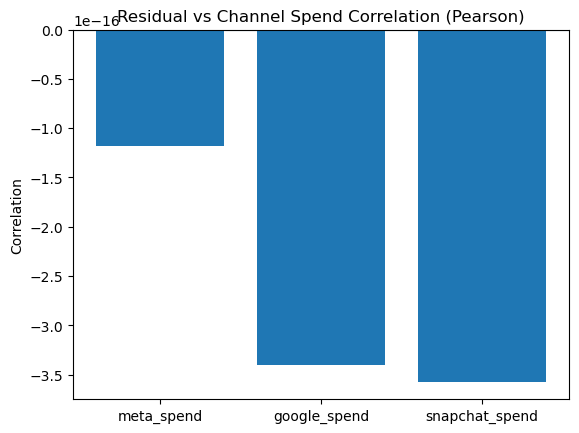

In [22]:
plt.figure()
plt.bar(results_df["channel"], results_df["pearson_corr"])
plt.axhline(0)
plt.ylabel("Correlation")
plt.title("Residual vs Channel Spend Correlation (Pearson)")
plt.show()

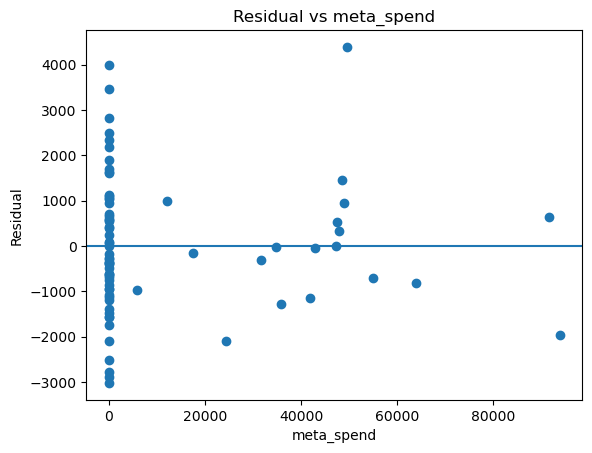

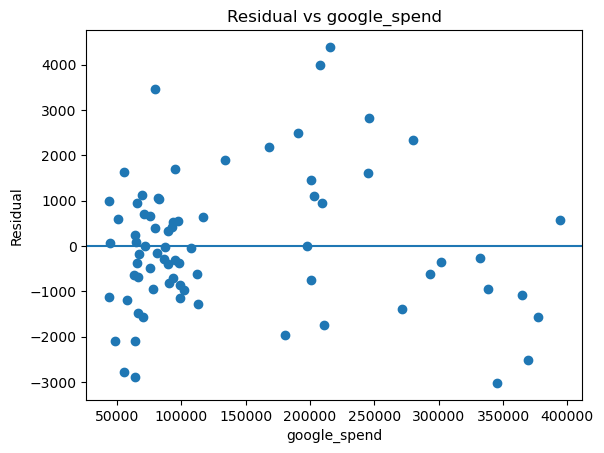

In [13]:
top_channels = results_df["channel"].head(2)

for ch in top_channels:
    plt.figure()
    plt.scatter(data[ch], data["residual"])
    plt.axhline(0)
    plt.xlabel(ch)
    plt.ylabel("Residual")
    plt.title(f"Residual vs {ch}")
    plt.show()

In [14]:
for ch in channels:
    corr, p = pearsonr(data["residual"].iloc[1:], data[ch].shift(1).iloc[1:])
    print(f"{ch} (lagged): corr={corr:.3f}, p={p:.3f}")

meta_spend (lagged): corr=0.058, p=0.626
google_spend (lagged): corr=-0.021, p=0.857
snapchat_spend (lagged): corr=0.173, p=0.143


Lagged Pearson correlation tests indicate no statistically significant dependence between model residuals and one-period–lagged channel spends, suggesting that short-run dynamic effects are adequately captured by the model.

# Results
I examined whether model residuals are correlated with contemporaneous or lagged channel spend as a diagnostic for omitted cross-channel or dynamic effects. Across all channels, correlations are small and statistically insignificant, indicating no evidence of systematic dependence between residuals and channel inputs.